In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from PIL import Image

import math
from math import fabs

import scipy.ndimage
from scipy import misc

In [ ]:
from datetime import datetime 

name = input('Please enter a patient name: ')
surname = input('Please enter a patient surname: ')
date_str = input('Please enter a date of a research in type \'dd/mm/yy\': ')
date = datetime.strptime(date_str, '%d/%m/%y').date()
patientId = input('Please, input patient id:')

comments = input('Please enter some comments: ')

Center:  200.0 z:  400  i  400
Górna czesc kola:  -82.84271247461902
Dolna czesc kola:  482.842712474619
Radius:  282.842712474619
Emiter (x,y):  200 0 Detektor (x,y):  225 -81
Emiter (x,y):  200 0 Detektor (x,y):  217 -82
Emiter (x,y):  200 0 Detektor (x,y):  210 -82
Emiter (x,y):  200 0 Detektor (x,y):  202 -82
Emiter (x,y):  200 0 Detektor (x,y):  194 -82
Emiter (x,y):  200 0 Detektor (x,y):  187 -82
Emiter (x,y):  200 0 Detektor (x,y):  179 -82
Emiter (x,y):  200 0 Detektor (x,y):  171 -81
Emiter (x,y):  200 0 Detektor (x,y):  164 -80
Emiter (x,y):  200 0 Detektor (x,y):  156 -79
Emiter (x,y):  200 0 Detektor (x,y):  148 -78
Emiter (x,y):  200 0 Detektor (x,y):  141 -76
Emiter (x,y):  200 0 Detektor (x,y):  133 -75
Emiter (x,y):  200 0 Detektor (x,y):  126 -73
Emiter (x,y):  200 0 Detektor (x,y):  119 -71
Emiter (x,y):  200 0 Detektor (x,y):  111 -68
Emiter (x,y):  200 0 Detektor (x,y):  104 -66
Emiter (x,y):  200 0 Detektor (x,y):  97 -63
Emiter (x,y):  200 0 Detektor (x,y):  90 -

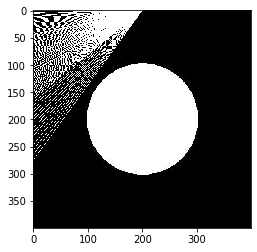

In [7]:
from bresenham import bresenham

image = imageio.imread('./tomograf-zdjecia/Kolo.jpg')
center = max(len(image), len(image[0]))/2
circleRed = plt.Circle((center, center), center * math.sqrt(2), edgecolor='w', facecolor='none')

fig, ax = plt.subplots() 
ax.set_facecolor('black')
#im = plt.imshow(image)

height_y = center - (center * math.sqrt(2) / 2)
low_y = center + (center * math.sqrt(2) / 2)
radius = center * 2 * math.sqrt(2) / 2      #od_srodka do boku * 2 * sqrt(2)\n",

print('Center: ', center, 'z: ', len(image), ' i ', len(image[0]))
print('Górna czesc kola: ', center - (center * 2 * math.sqrt(2) / 2))
print('Dolna czesc kola: ', center + center * 2 * math.sqrt(2) / 2)
print('Radius: ', radius)

kat = math.pi/14            #TODO: kat ma byc podawany przez uzytkownika
l_det = 140
max_rozwarcie = 0.6 * 2 * math.pi

# ilosc_katow = ??

em_x = 200 #int(center + radius * math.cos(kat))
em_y = 0 #int(center + radius * math.sin(kat))
           
if (em_y > low_y):
    em_y = int(center - radius * math.cos(kat))

if (em_x > low_y):
    em_x = int(center - radius * math.sin(kat))


for detector in range(l_det):
    det_x = int(center + radius * math.cos(kat + math.pi - max_rozwarcie/2 + detector * max_rozwarcie/ (l_det - 1)))
    if (det_x > low_y):
        det_x = int(center - radius * math.cos(kat + math.pi - max_rozwarcie/2 + detector * max_rozwarcie/ (l_det - 1)))
    det_y = int(center + radius * math.sin(kat + math.pi - max_rozwarcie/2 + detector * max_rozwarcie/ (l_det - 1)))
    if (det_y > low_y):
        det_y = int(center - radius * math.sin(kat + math.pi - max_rozwarcie/2 + detector * max_rozwarcie/ (l_det - 1)))
    print('Emiter (x,y): ', em_x, em_y, 'Detektor (x,y): ', det_x, det_y)
    #algBresenhama(1, 1, em_x, em_y, det_x, det_y)
    points = list(bresenham(em_y, em_x, det_x, det_y))
    #print(points[0][0])
    for x, y in points:
        if x>=0 and y>=0:
            image[x][y] = [255, 255, 255]              #255 -> bialy, 0 -> czarny
        #print("wstawiam 0 na ", x, y)
        
        
#zamiast tego stworzyc funkcje ze wzorami ilosc emiterow

plt.imshow(image)
#im = plt.imshow(image)
#ax.add_patch(circleRed)
#plt.plot()

### Tworzenie sinogramu

In [ ]:
# suma pikseli dla kazdego [emiter][kat]
sinog = [ [ 0 for y in range( ilosc_katow ) ] for x in range( l_det ) ]
# ilosc skladnikow odpowiadajaca kazdej komorce z tablicy sinog
l_op_sinog = [ [ 0 for y in range( ilosc_katow ) ] for x in range( l_det ) ]
# wartosc srednia dla kazdego [emiter][kat] -> sinog/l_op_sinog
sinogram = [ [ 0 for y in range( ilosc_katow ) ] for x in range( l_det ) ]

def to_sinogram():
    for k in range(ilosc_katow):
        for e in range(l_det):
            try:
                val = int(round(sinog[e][k]/l_op_sinog[e][k]))
            except:
                val = 0
            sinogram[e][k] = [val, val, val]

##############            
to_sinogram()

sinogram_array = np.asarray(sinogram)
plt.imshow(sinogram_array)